# Conservation of invariants and code stability

This notebook aims at investigation the stability of the code as a function of input parameters and the conservation of invariants such as energy and momentum.


In [1]:
# some preliminary settings and functions

import sys
sys.path.append("/home/aunai/build_phare")
sys.path.append("/home/aunai/PHARE/pyphare/")
import os
import numpy as np
import pyphare
from pyphare.pharesee.hierarchy import finest_data
from pyphare.pharesee.hierarchy import hierarchy_from
from pyphare.pharesee.plotting import zoom_effect
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
%matplotlib notebook


In [2]:
def plot_job(job, time, qty, file_idx=None,**kwargs):
    path = os.path.join(main_jobs_path, job)
    r = Run(path)
    t=time        
    B = r.GetB(t)
    #N = r.GetNi(t)
    #V = r.GetVi(t)
    if qty in ("Bx","By","Bz"):
        self = B
    if qty == "rho":
        self = N
    if qty in ("Vx", "Vy", "Vz"):
        self = V
    fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(8,6), sharex=True)
    colors = ["k", "b", "r"]
    for ilvl, lvl in self.patch_levels.items():
        for pidx, patch in enumerate(lvl.patches):
            pdata  = patch.patch_datas[qty]
            x,v = finest_data(pdata, ilvl, self)
            ax1.plot(x, v,label="lev{} - patch{}".format(ilvl, pidx),
                     marker='o', markersize=2, color=colors[ilvl])

    for ilvl,level in B.patch_levels.items():
        for patch in level.patches:
            dx = patch.dx
            x0 = patch.origin[0]
            x1 = (patch.box.upper[0]+1)*dx
            ax2.axvspan(x0, x1, color='b',ec='k', alpha=0.2,
                        ymin=ilvl/4, ymax=(ilvl+1)/4)

    ax1.set_title("{} at t = {}".format(job,t))

    ax1.set_ylim(kwargs.get("ylim",(-3.5, 3.5)))

    ax1.set_xlim(kwargs.get("xlim", (0,500)))
    if file_idx is not None:
        fig.savefig(path+'/'+job+"_"+qty+"_{:04d}.png".format(file_idx))
        plt.close(fig)
    return fig, ax1, ax2

## run001 : test run to load and plot particle data

The run has a uniform density n=1, B=Bx=1, Vth=0.3, there are 400 cells with 100 particles per cell. See [input script](/home/aunai/phare_jobs/tests/conservation/run001/conserv.py)

In [3]:
r = Run("/home/aunai/phare_jobs/tests/conservation/run001/")

We load domain particles

In [4]:
prodom = r.GetParticles(0, "protons")

In [12]:
type(prodom)

pyphare.pharesee.hierarchy.PatchHierarchy

Plottont the distribution with all default params produces a $V_x,V_y$ distribution for all level 0 particles

<IPython.core.display.Javascript object>


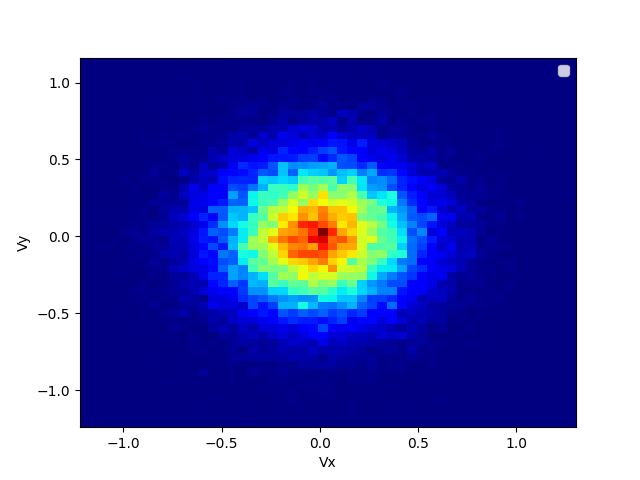

No handles with labels found to put in legend.


In [6]:
prodom.dist_plot()

one can specify the axis, below is the $x,V_x$ phase space

<IPython.core.display.Javascript object>


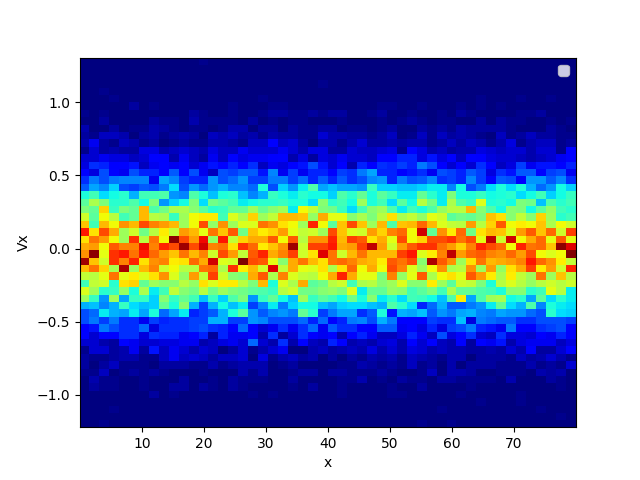

No handles with labels found to put in legend.


In [7]:
prodom.dist_plot(axis=("x","Vx"))

we can overplot the Kernel Density Estimate (KDE). This can take a little longer to compute...

<IPython.core.display.Javascript object>


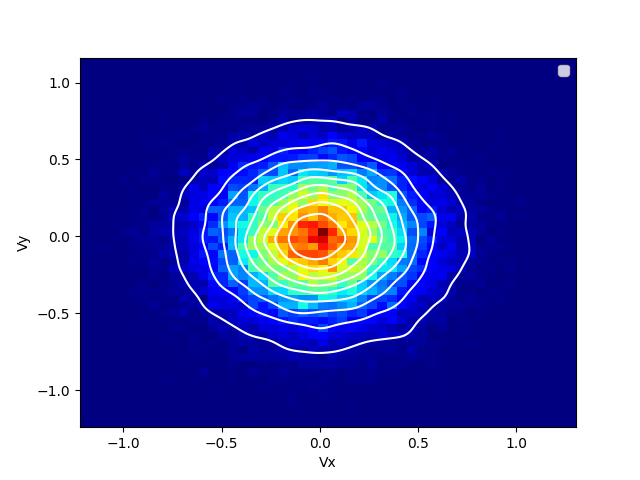

/opt/venv38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


In [14]:
prodom.dist_plot(kde=True)

One can display the bulk velocity

<IPython.core.display.Javascript object>


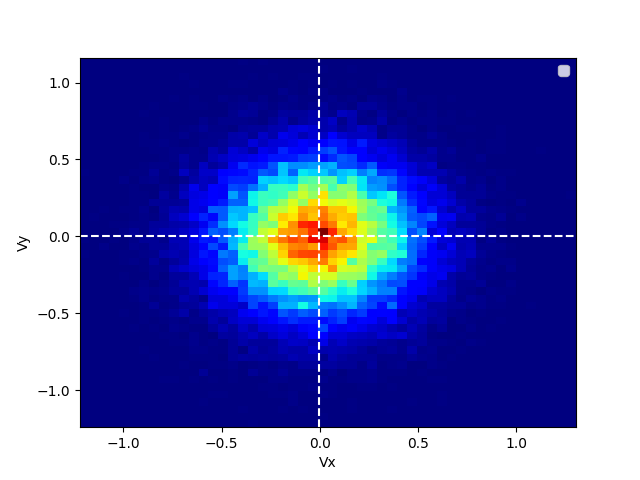

No handles with labels found to put in legend.


In [15]:
prodom.dist_plot(bulk=True)